In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mtick

In [10]:
loan_data = pd.read_csv('../data/loan_data.csv')
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [13]:
loan_data.shape

(9578, 14)

In [9]:
# Set up the plotting style
plt.style.use('ggplot')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [15]:
# Check for missing values
missing_values = loan_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


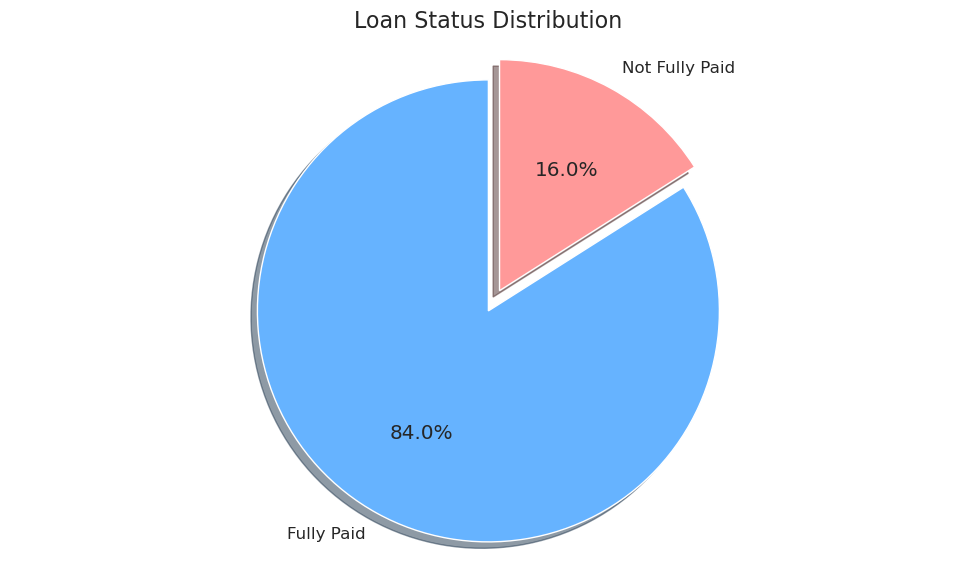

In [17]:
# 1. Target Variable Distribution - Pie Chart
plt.figure(figsize=(10, 6))
labels = ['Fully Paid', 'Not Fully Paid']
sizes = [
    loan_data[loan_data['not.fully.paid'] == 0].shape[0],
    loan_data[loan_data['not.fully.paid'] == 1].shape[0]
]
colors = ['#66b3ff', '#ff9999']
explode = (0, 0.1)  # explode the 2nd slice (Not Fully Paid)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Loan Status Distribution')
plt.tight_layout()
plt.savefig('./figures/loan_status_distribution.png')
plt.show()

In [18]:
# Calculate default rate
default_rate = loan_data['not.fully.paid'].mean() * 100
print(f"\nDefault Rate: {default_rate:.2f}%")


Default Rate: 16.01%


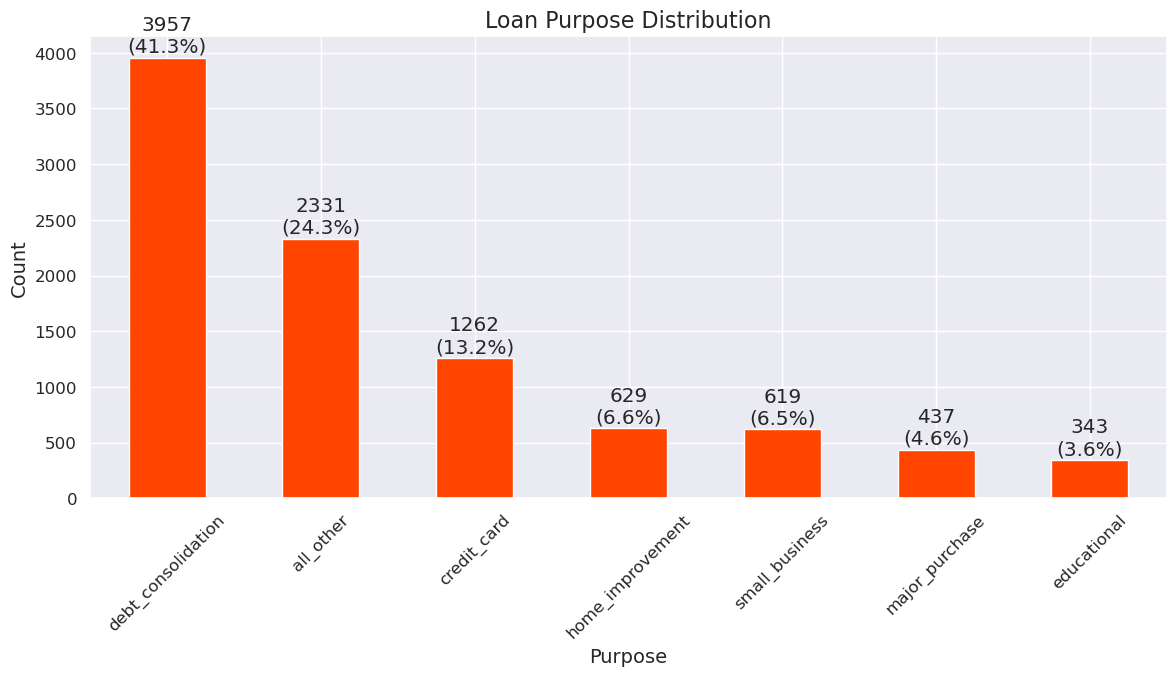

In [25]:
# 2. Purpose Distribution - Bar Chart
plt.figure(figsize=(12, 7))
purpose_counts = loan_data['purpose'].value_counts()
ax = purpose_counts.plot(kind='bar', color='orangered')
plt.title('Loan Purpose Distribution')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add count and percentage labels on top of each bar
total = len(loan_data)
for i, v in enumerate(purpose_counts):
    percentage = v / total * 100
    ax.text(i, v + 50, f"{v}\n({percentage:.1f}%)", ha='center')

plt.tight_layout()
plt.savefig('./figures/loan_purpose_distribution.png')
plt.show()


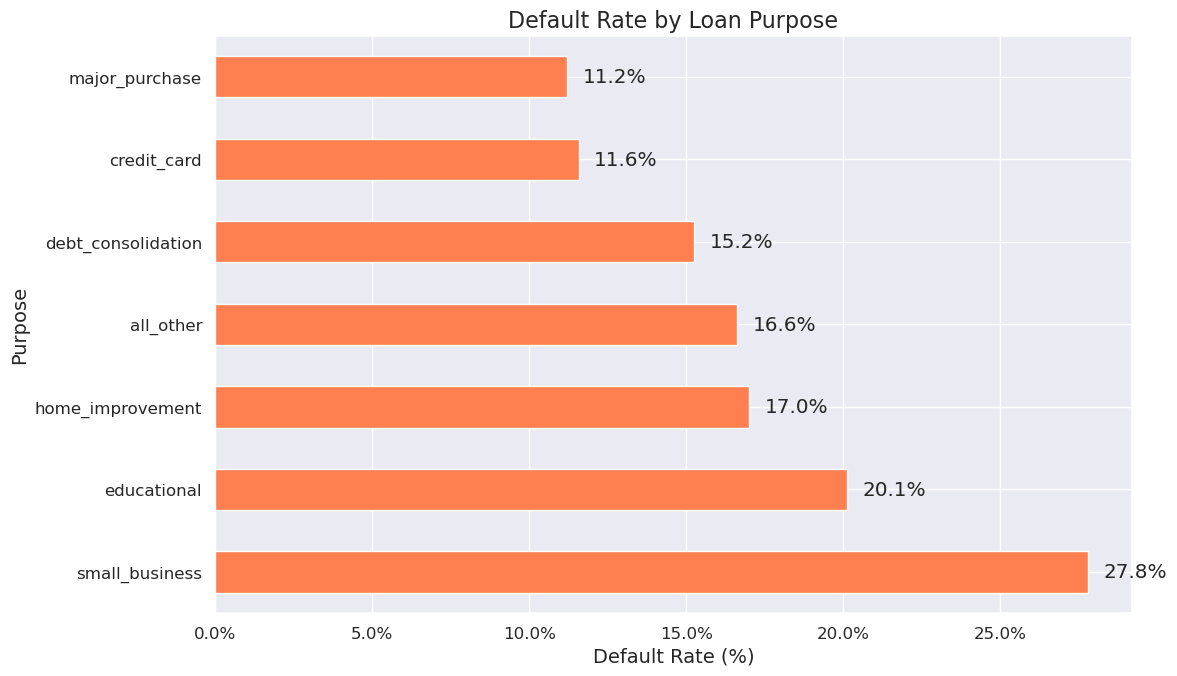

In [26]:
# 3. Default Rate by Loan Purpose - Horizontal Bar Chart
plt.figure(figsize=(12, 7))
default_by_purpose = loan_data.groupby('purpose')['not.fully.paid'].mean() * 100
default_by_purpose = default_by_purpose.sort_values(ascending=False)

ax = default_by_purpose.plot(kind='barh', color='coral')
plt.title('Default Rate by Loan Purpose')
plt.xlabel('Default Rate (%)')
plt.ylabel('Purpose')

# Format x-axis as percentage
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

# Add percentage labels at the end of each bar
for i, v in enumerate(default_by_purpose):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center')

plt.tight_layout()
plt.savefig('default_rate_by_purpose.png')
plt.show()

/tmp/ipykernel_8545/1941170945.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_by_fico = loan_data.groupby('fico_range')['not.fully.paid'].mean() * 100


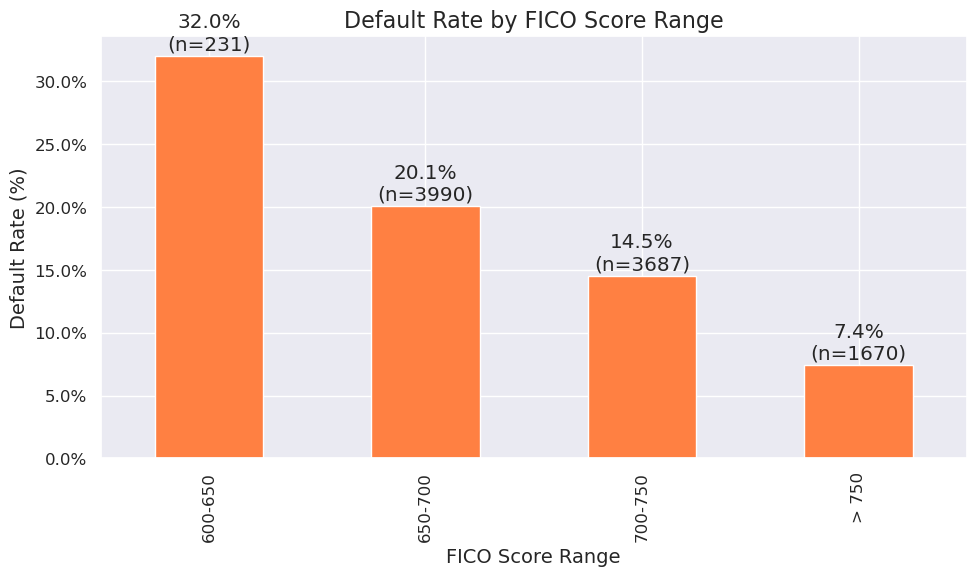

In [28]:
# 4. FICO Score Analysis

# Calculate default rate by FICO score range
loan_data['fico_range'] = pd.cut(
    loan_data['fico'], 
    bins=[600, 650, 700, 750, 850], 
    labels=['600-650', '650-700', '700-750', '> 750']
)

default_by_fico = loan_data.groupby('fico_range')['not.fully.paid'].mean() * 100
fico_counts = loan_data['fico_range'].value_counts().sort_index()

# Bar chart of default rate by FICO range
plt.figure(figsize=(10, 6))
ax = default_by_fico.plot(kind='bar', color='#FF8042')
plt.title('Default Rate by FICO Score Range')
plt.xlabel('FICO Score Range')
plt.ylabel('Default Rate (%)')

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add percentage and count labels on top of each bar
for i, v in enumerate(default_by_fico):
    count = fico_counts[default_by_fico.index[i]]
    ax.text(i, v + 0.5, f"{v:.1f}%\n(n={count})", ha='center')

plt.tight_layout()
plt.savefig('./figures/default_rate_by_fico.png')
plt.show()

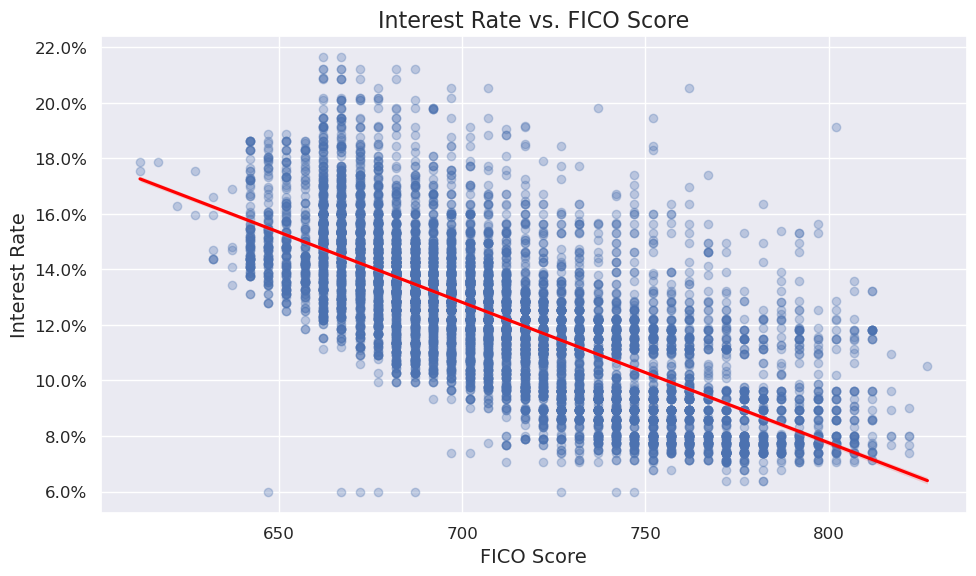


Correlation between FICO Score and Interest Rate: -0.7148


In [29]:
# 5. Interest Rate vs. FICO Score - Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='fico', y='int.rate', data=loan_data, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Interest Rate vs. FICO Score')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.savefig('./figures/interest_rate_vs_fico.png')
plt.show()

# Calculate correlation
correlation = loan_data[['fico', 'int.rate']].corr().iloc[0, 1]
print(f"\nCorrelation between FICO Score and Interest Rate: {correlation:.4f}")


/tmp/ipykernel_8545/1843725118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fico_range', y='int.rate', data=loan_data, palette='Blues')


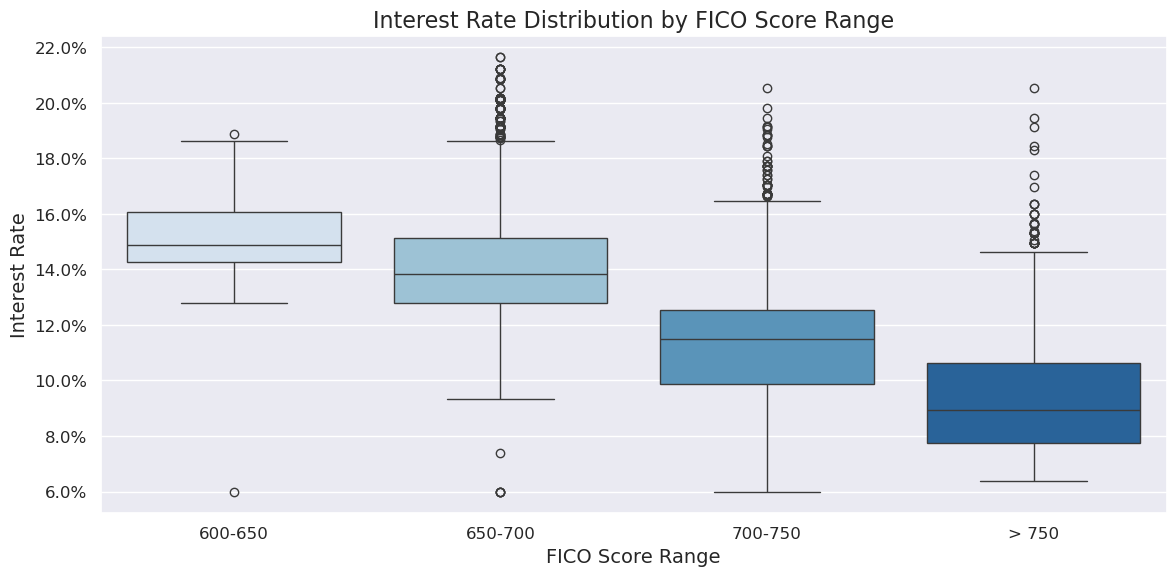

In [30]:
# 6. Interest Rate by FICO Range - Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='fico_range', y='int.rate', data=loan_data, palette='Blues')
plt.title('Interest Rate Distribution by FICO Score Range')
plt.xlabel('FICO Score Range')
plt.ylabel('Interest Rate')

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.savefig('./figures/interest_rate_by_fico_range.png')
plt.show()


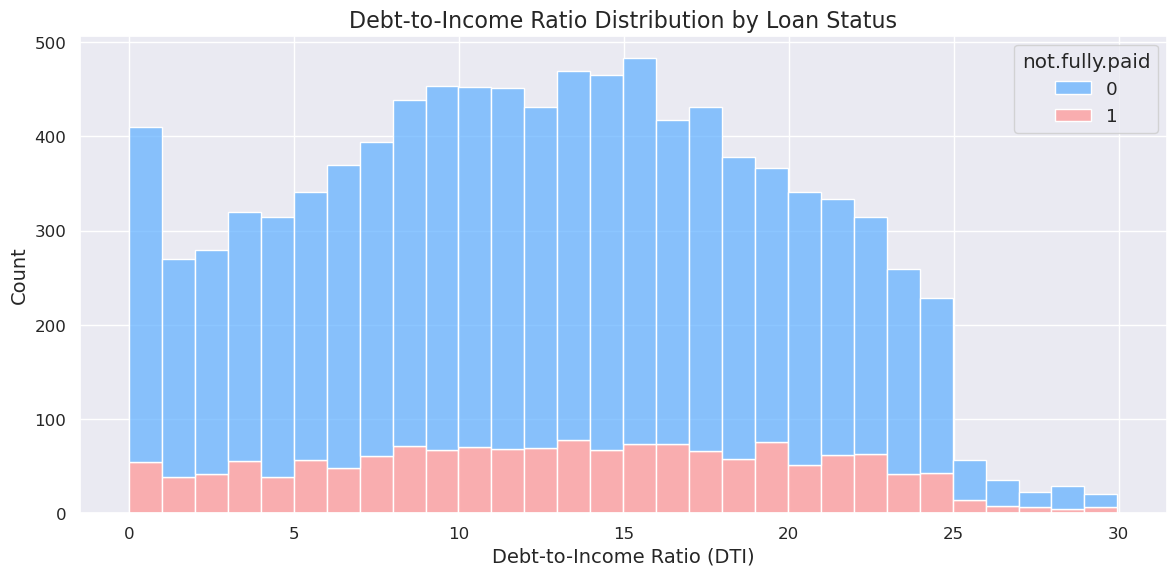

In [33]:
# 9. Debt-to-Income Ratio Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=loan_data, x='dti', hue='not.fully.paid', 
             multiple='stack', bins=30, palette=['#66b3ff', '#ff9999'])
plt.title('Debt-to-Income Ratio Distribution by Loan Status')
plt.xlabel('Debt-to-Income Ratio (DTI)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('./figures/dti_distribution.png')
plt.show()

<Figure size 1000x600 with 0 Axes>

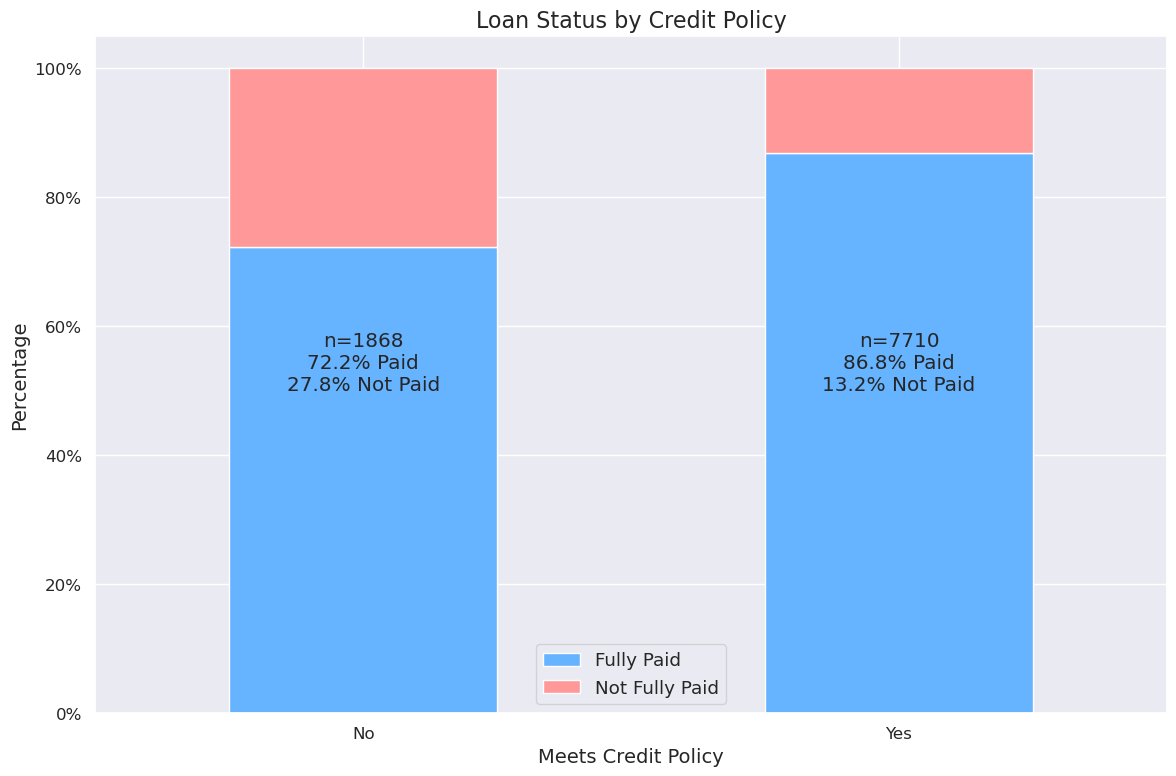

In [34]:
# 10. Credit Policy Analysis - Bar Chart
plt.figure(figsize=(10, 6))
credit_policy_counts = loan_data.groupby(['credit.policy', 'not.fully.paid']).size().unstack()
credit_policy_pct = credit_policy_counts.div(credit_policy_counts.sum(axis=1), axis=0) * 100

ax = credit_policy_pct.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'])
plt.title('Loan Status by Credit Policy')
plt.xlabel('Meets Credit Policy')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add annotations
for i, (fully_paid, not_fully_paid) in enumerate(zip(credit_policy_pct[0], credit_policy_pct[1])):
    count = credit_policy_counts.iloc[i].sum()
    ax.text(i, 50, f"n={count}\n{fully_paid:.1f}% Paid\n{not_fully_paid:.1f}% Not Paid", ha='center')

plt.legend(['Fully Paid', 'Not Fully Paid'])
plt.tight_layout()
plt.savefig('./figures/loan_status_by_credit_policy.png')
plt.show()


<Figure size 1400x800 with 0 Axes>

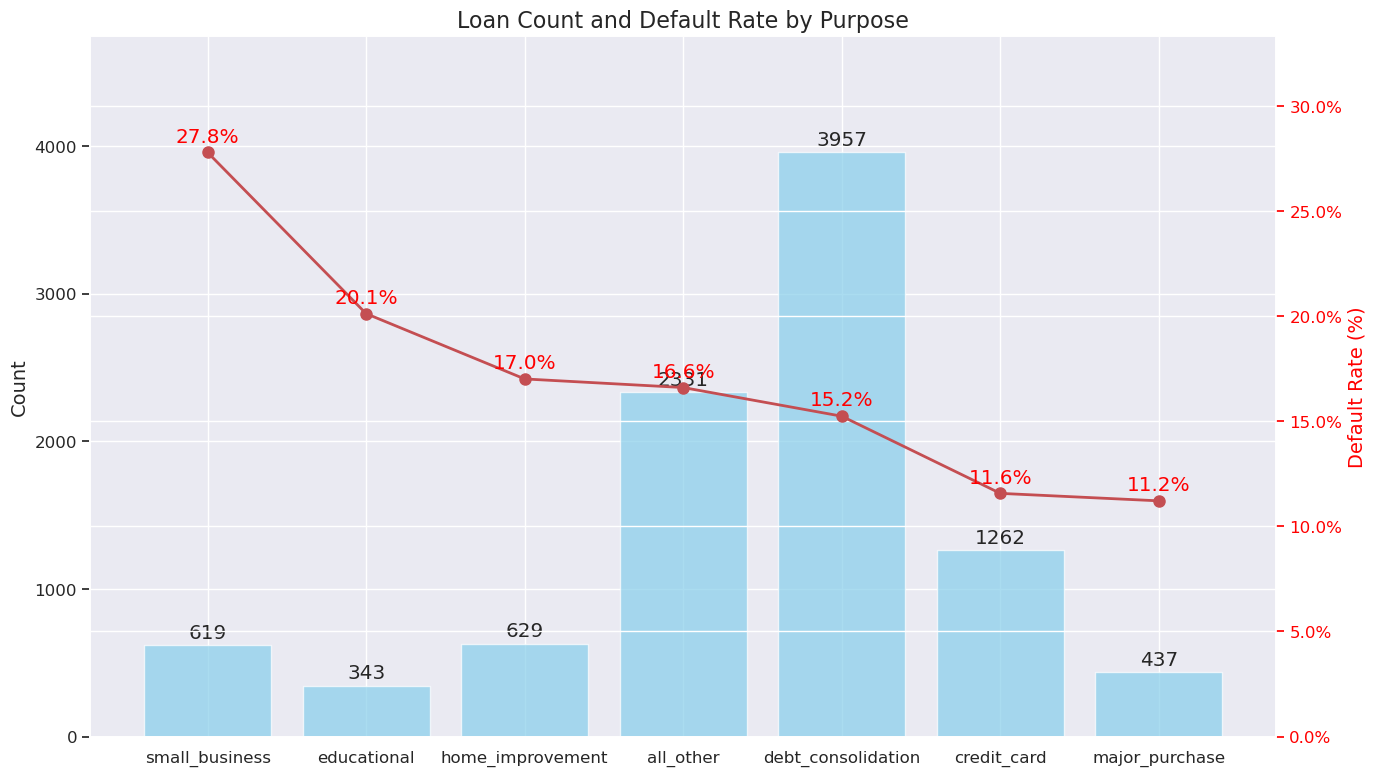

In [35]:
# 11. Purpose and Default Rate (Combined visualization)
plt.figure(figsize=(14, 8))

# Calculate the counts and default rates
purpose_data = pd.DataFrame({
    'count': loan_data['purpose'].value_counts(),
    'default_rate': loan_data.groupby('purpose')['not.fully.paid'].mean() * 100
})

# Sort by default rate
purpose_data = purpose_data.sort_values('default_rate', ascending=False)

# Create subplot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()

# Plot bars for counts
bars = ax1.bar(purpose_data.index, purpose_data['count'], color='skyblue', alpha=0.7)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_ylim(0, purpose_data['count'].max() * 1.2)

# Plot line for default rate
ax2.plot(purpose_data.index, purpose_data['default_rate'], 'ro-', linewidth=2, markersize=8)
ax2.set_ylabel('Default Rate (%)', fontsize=14, color='red')
ax2.set_ylim(0, purpose_data['default_rate'].max() * 1.2)
ax2.tick_params(axis='y', colors='red')

# Format y-axis as percentage
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add data labels
for i, v in enumerate(purpose_data['count']):
    ax1.text(i, v + 50, f"{v}", ha='center')
    
for i, v in enumerate(purpose_data['default_rate']):
    ax2.text(i, v + 0.5, f"{v:.1f}%", ha='center', color='red')

plt.title('Loan Count and Default Rate by Purpose', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./figures/loan_count_and_default_rate_by_purpose.png')
plt.show()

/tmp/ipykernel_8545/1730671783.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revol_util_default = loan_data.groupby('revol_util_range')['not.fully.paid'].mean() * 100


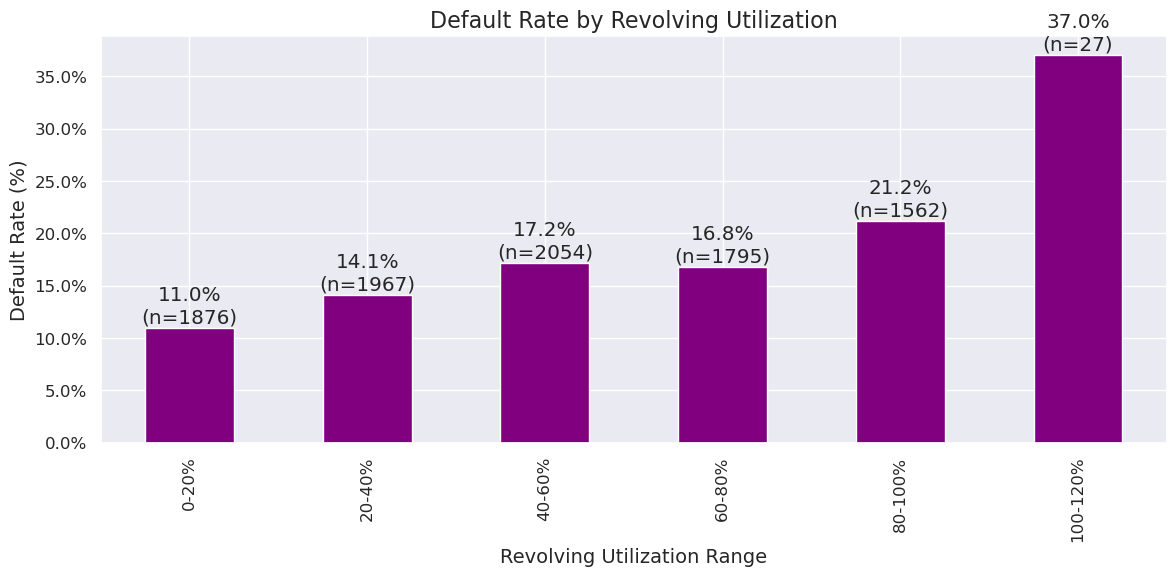

In [36]:
# 12. Revolving Utilization vs. Default Probability
plt.figure(figsize=(12, 6))

# Create bins for revolving utilization
loan_data['revol_util_range'] = pd.cut(
    loan_data['revol.util'], 
    bins=[0, 20, 40, 60, 80, 100, 120], 
    labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%', '100-120%']
)

# Calculate default rate by revolving utilization range
revol_util_default = loan_data.groupby('revol_util_range')['not.fully.paid'].mean() * 100
revol_util_counts = loan_data['revol_util_range'].value_counts().sort_index()

# Bar chart
ax = revol_util_default.plot(kind='bar', color='purple')
plt.title('Default Rate by Revolving Utilization')
plt.xlabel('Revolving Utilization Range')
plt.ylabel('Default Rate (%)')

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add percentage and count labels
for i, v in enumerate(revol_util_default):
    count = revol_util_counts[revol_util_default.index[i]]
    ax.text(i, v + 0.5, f"{v:.1f}%\n(n={count})", ha='center')

plt.tight_layout()
plt.savefig('./figures/default_rate_by_revol_util.png')
plt.show()

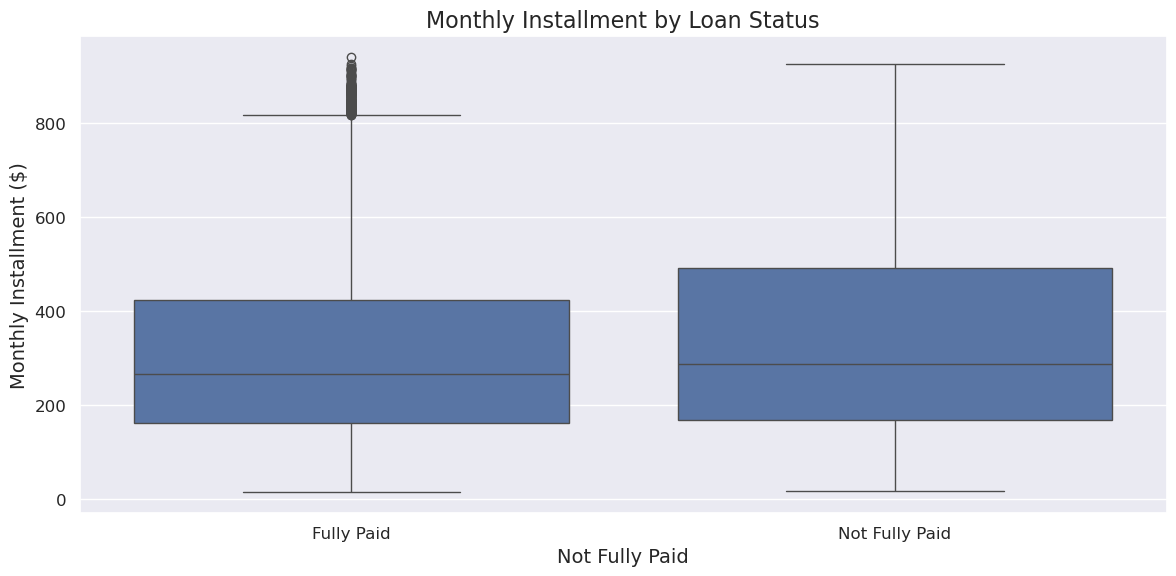


Summary statistics by loan status:
                 count        mean         std    min     25%     50%     75%  \
not.fully.paid                                                                  
0               8045.0  314.574123  203.398688  15.67  162.25  266.52  423.95   
1               1533.0  342.785114  223.948527  15.91  168.64  287.31  491.30   

                   max  
not.fully.paid          
0               940.14  
1               926.83  


In [37]:
# 13. Installment vs. Loan Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='not.fully.paid', y='installment', data=loan_data)
plt.title('Monthly Installment by Loan Status')
plt.xlabel('Not Fully Paid')
plt.ylabel('Monthly Installment ($)')
plt.xticks(ticks=[0, 1], labels=['Fully Paid', 'Not Fully Paid'])
plt.tight_layout()
plt.savefig('./figures/installment_by_loan_status.png')
plt.show()

# Print summary statistics by loan status
print("\nSummary statistics by loan status:")
print(loan_data.groupby('not.fully.paid')['installment'].describe())


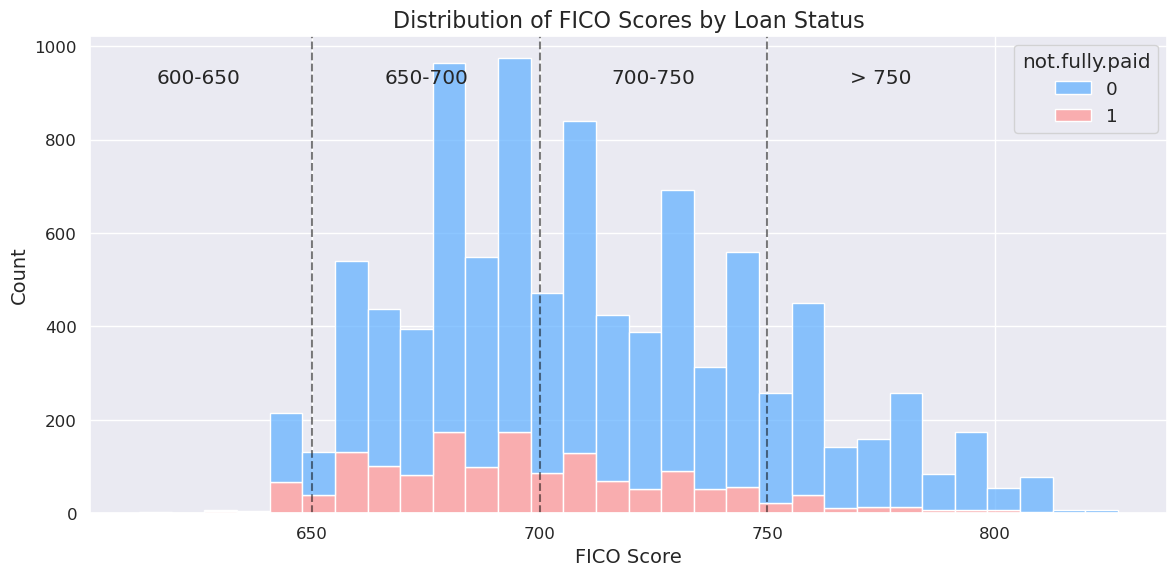

In [38]:
# 14. Distribution of FICO Scores
plt.figure(figsize=(12, 6))
sns.histplot(data=loan_data, x='fico', hue='not.fully.paid', 
             multiple='stack', bins=30, palette=['#66b3ff', '#ff9999'])
plt.title('Distribution of FICO Scores by Loan Status')
plt.xlabel('FICO Score')
plt.ylabel('Count')

# Add vertical lines for FICO ranges
plt.axvline(x=650, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=700, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=750, color='black', linestyle='--', alpha=0.5)

# Add text annotations for FICO ranges
plt.text(625, plt.ylim()[1]*0.9, '600-650', ha='center')
plt.text(675, plt.ylim()[1]*0.9, '650-700', ha='center')
plt.text(725, plt.ylim()[1]*0.9, '700-750', ha='center')
plt.text(775, plt.ylim()[1]*0.9, '> 750', ha='center')

plt.tight_layout()
plt.savefig('./figures/fico_distribution.png')
plt.show()


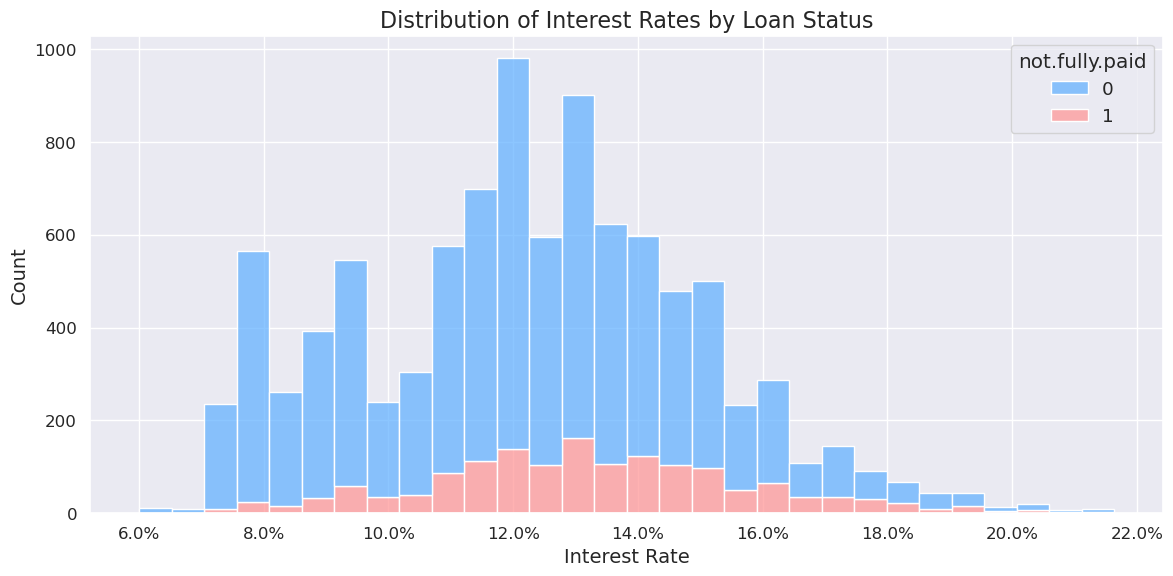


EDA completed successfully! All visualizations have been saved.


In [39]:
# 15. Interest Rate Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=loan_data, x='int.rate', hue='not.fully.paid', 
             multiple='stack', bins=30, palette=['#66b3ff', '#ff9999'])
plt.title('Distribution of Interest Rates by Loan Status')
plt.xlabel('Interest Rate')
plt.ylabel('Count')

# Format x-axis as percentage
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.savefig('./figures/interest_rate_distribution.png')
plt.show()

print("\nEDA completed successfully! All visualizations have been saved.")